In [1]:
import math

# Hàm tính khoảng cách Euclid giữa hai điểm
def euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

# Hàm tính khoảng cách giữa hai cụm (Single Linkage)
def single_linkage_distance(cluster1, cluster2):
    return min(euclidean_distance(p1, p2) for p1 in cluster1 for p2 in cluster2)

# Thuật toán Agglomerative Hierarchical Clustering
def hierarchical_clustering(data):
    # Khởi tạo mỗi điểm là một cụm
    clusters = [[point] for point in data]

    # Lưu trữ lịch sử gộp cụm
    history = []

    # Lặp cho đến khi chỉ còn một cụm
    while len(clusters) > 1:
        # Tìm hai cụm gần nhất
        min_distance = float('inf')
        closest_pair = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = single_linkage_distance(clusters[i], clusters[j])
                if distance < min_distance:
                    min_distance = distance
                    closest_pair = (i, j)

        # Gộp hai cụm gần nhất
        i, j = closest_pair
        new_cluster = clusters[i] + clusters[j]
        history.append((clusters[i], clusters[j], min_distance))
        clusters.pop(j)  # Xóa cụm thứ j (thứ tự quan trọng)
        clusters.pop(i)  # Xóa cụm thứ i
        clusters.append(new_cluster)  # Thêm cụm mới

    return clusters, history

# Dữ liệu đầu vào (2D)
data = [
    [1, 1],
    [1, 2],
    [2, 2],
    [8, 8],
    [8, 9],
    [9, 9]
]

# Thực hiện phân cụm
final_clusters, merge_history = hierarchical_clustering(data)

# Kết quả
print("Cụm cuối cùng:")
print(final_clusters)

print("\nLịch sử gộp cụm:")
for step in merge_history:
    print(f"Gộp cụm {step[0]} và {step[1]} với khoảng cách {step[2]:.2f}")


Cụm cuối cùng:
[[[2, 2], [1, 1], [1, 2], [9, 9], [8, 8], [8, 9]]]

Lịch sử gộp cụm:
Gộp cụm [[1, 1]] và [[1, 2]] với khoảng cách 1.00
Gộp cụm [[2, 2]] và [[1, 1], [1, 2]] với khoảng cách 1.00
Gộp cụm [[8, 8]] và [[8, 9]] với khoảng cách 1.00
Gộp cụm [[9, 9]] và [[8, 8], [8, 9]] với khoảng cách 1.00
Gộp cụm [[2, 2], [1, 1], [1, 2]] và [[9, 9], [8, 8], [8, 9]] với khoảng cách 8.49


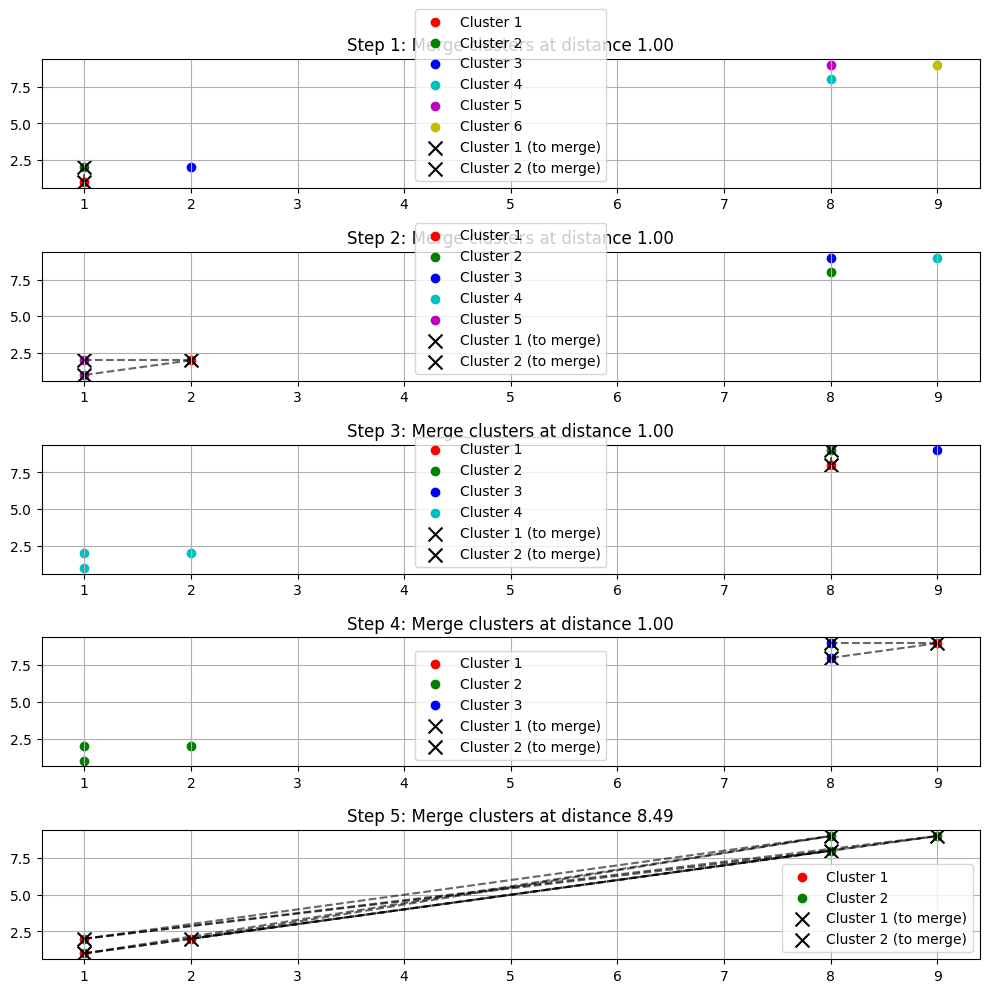

In [2]:
import matplotlib.pyplot as plt

# Hàm trực quan hóa dữ liệu và quá trình gộp cụm
def visualize_clustering(data, history):
    # Chuyển đổi dữ liệu về dạng danh sách để dễ quản lý
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Màu sắc cho các cụm
    current_clusters = [[point] for point in data]

    # Trực quan hóa từng bước gộp cụm
    plt.figure(figsize=(10, len(history) * 2))
    for step, (cluster1, cluster2, distance) in enumerate(history, start=1):
        plt.subplot(len(history), 1, step)
        plt.title(f"Step {step}: Merge clusters at distance {distance:.2f}")

        # Gắn màu cho các cụm
        for i, cluster in enumerate(current_clusters):
            cluster_color = colors[i % len(colors)]
            x, y = zip(*cluster)
            plt.scatter(x, y, color=cluster_color, label=f"Cluster {i+1}")

        # Hiển thị cụm hiện tại
        x1, y1 = zip(*cluster1)
        x2, y2 = zip(*cluster2)
        plt.scatter(x1, y1, color='black', marker='x', s=100, label="Cluster 1 (to merge)")
        plt.scatter(x2, y2, color='black', marker='x', s=100, label="Cluster 2 (to merge)")

        # Gộp cụm
        new_cluster = cluster1 + cluster2
        current_clusters.remove(cluster1)
        current_clusters.remove(cluster2)
        current_clusters.append(new_cluster)

        # Vẽ đường nối giữa các cụm
        for p1 in cluster1:
            for p2 in cluster2:
                plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k--', alpha=0.6)

        plt.legend()
        plt.grid()

    plt.tight_layout()
    plt.show()

# Dữ liệu đầu vào
data = [
    [1, 1],
    [1, 2],
    [2, 2],
    [8, 8],
    [8, 9],
    [9, 9]
]

# Thực hiện phân cụm
final_clusters, merge_history = hierarchical_clustering(data)

# Trực quan hóa quá trình gộp cụm
visualize_clustering(data, merge_history)
